# NAME: ANSAH KELVIN 

# INDEX NUMBER: 8672421

In [ ]:
import xarray as xr
import  matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

in_file= ("Africa_cru_data.nc")

# OPENING DATASET

In [2]:
d1=xr.open_dataset(in_file)
d1

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
precip=d1.pre
precip

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

# SELECTING DATA FROM THE STATION (KUMASI)

In [4]:
kumasi_da=precip.sel(lat=6.667, lon=-1.616 , method="nearest")
kumasi_da

<xarray.DataArray 'pre' (time: 1440)>
[1440 values with dtype=float32]
Coordinates:
    lon      float32 -1.75
    lat      float32 6.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [5]:
#precip=precip.where(precip<2000)

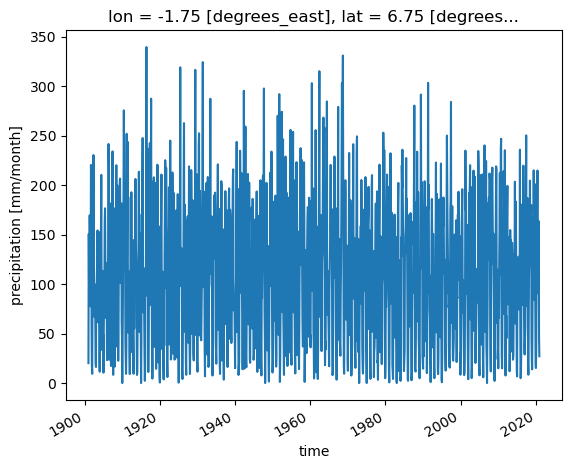

In [6]:
kumasi_da.plot()

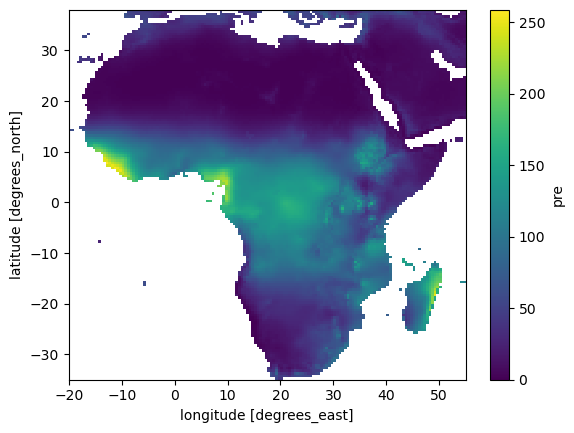

In [7]:
precip.mean('time').plot()

# EXTRACT DATA FROM GHANA

In [8]:
ghana_da=precip.sel(
    lon=slice(-3.5,1.5),
    lat=slice(4.5,11.5))
ghana_da

<xarray.DataArray 'pre' (time: 1440, lat: 14, lon: 10)>
array([[[      nan, 7.310e+01, ...,       nan,       nan],
        [4.850e+01, 6.790e+01, ...,       nan,       nan],
        ...,
        [1.900e+00, 8.000e-01, ..., 0.000e+00, 0.000e+00],
        [1.000e+00, 8.000e-01, ..., 0.000e+00, 0.000e+00]],

       [[      nan, 1.673e+02, ...,       nan,       nan],
        [1.350e+02, 2.036e+02, ...,       nan,       nan],
        ...,
        [1.900e+00, 1.600e+00, ..., 8.000e-01, 1.400e+00],
        [1.000e+00, 8.000e-01, ..., 5.000e-01, 0.000e+00]],

       ...,

       [[      nan, 1.060e+02, ...,       nan,       nan],
        [1.060e+02, 1.000e+02, ...,       nan,       nan],
        ...,
        [0.000e+00, 0.000e+00, ..., 2.000e-01, 2.000e-01],
        [0.000e+00, 0.000e+00, ..., 2.000e-01, 2.000e-01]],

       [[      nan, 5.600e+01, ...,       nan,       nan],
        [4.900e+01, 4.700e+01, ...,       nan,       nan],
        ...,
        [0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

(array([7.5466e+04, 4.6357e+04, 3.9497e+04, 1.8362e+04, 5.8610e+03,
        1.2640e+03, 2.6800e+02, 8.1000e+01, 3.2000e+01, 1.2000e+01]),
 array([  0.        ,  63.70000076, 127.40000153, 191.1000061 ,
        254.80000305, 318.5       , 382.20001221, 445.8999939 ,
        509.6000061 , 573.29998779, 637.        ]),
 <BarContainer object of 10 artists>)

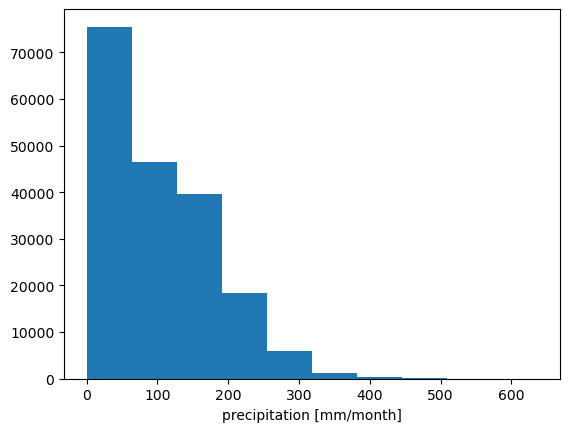

In [9]:
ghana_da.plot()

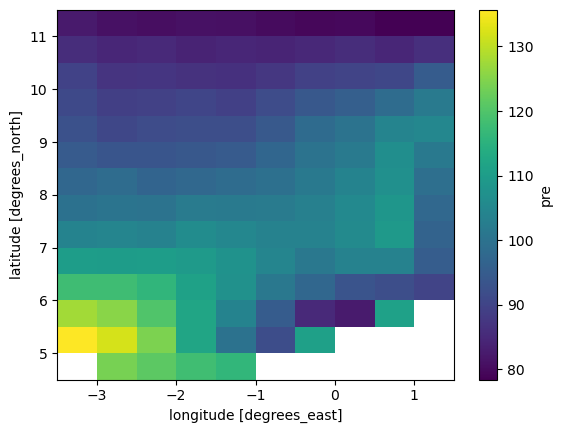

In [10]:
#to find the time over the data
ghana_da.mean('time').plot()

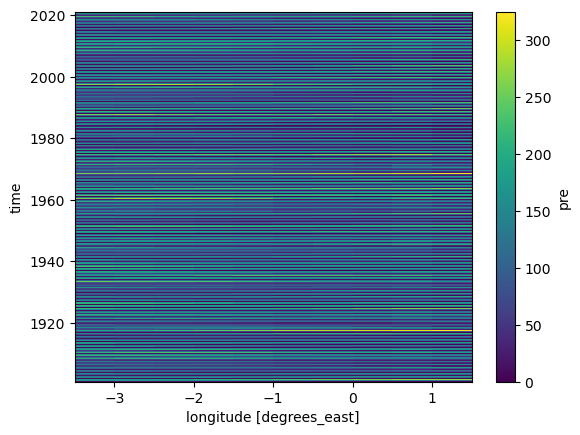

In [11]:
#to find the mean over the latitude
ghana_da.mean('lat').plot()

# SPLIT DATA INTO 4 CLIMO REGIMES

cr1 = 1901 - 1930

cr2 = 1931 - 1960

cr3 = 1961 - 1990

cr4 = 1991 - 2020

In [12]:
cr1=ghana_da.sel(time=slice("1901","1930"))
cr2=ghana_da.sel(time=slice("1931","1960"))
cr3=ghana_da.sel(time=slice("1961","1990"))
cr4=ghana_da.sel(time=slice("1991","2020"))

In [13]:
cr2

<xarray.DataArray 'pre' (time: 360, lat: 14, lon: 10)>
array([[[      nan, 78.200005, ...,       nan,       nan],
        [66.9     , 68.5     , ...,       nan,       nan],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       [[      nan, 38.8     , ...,       nan,       nan],
        [40.      , 40.600002, ...,       nan,       nan],
        ...,
        [ 6.      ,  6.      , ...,  0.4     ,  0.3     ],
        [ 3.3     ,  2.5     , ...,  0.      ,  0.      ]],

       ...,

       [[      nan, 96.      , ...,       nan,       nan],
        [94.200005, 87.8     , ...,       nan,       nan],
        ...,
        [10.900001,  8.400001, ...,  3.      ,  3.5     ],
        [13.400001, 10.400001, ...,  1.1     ,  0.9     ]],

       [[      nan, 90.3     , ...,       nan,       nan],
        [98.9     , 90.200005, ...,       nan,       nan],
        ...,
        [18.5     , 10.6     , ...,  9.7     ,  3.4     ],
        [12.8     , 11.5     , ...,  5.6     ,  2.9     ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1931-01-16 1931-02-15 ... 1960-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

# GROUPING BY ANNUAL SUM

In [14]:
cr1_annual_sum=cr1.groupby("time.year").sum("time")
cr2_annual_sum=cr2.groupby("time.year").sum("time")
cr3_annual_sum=cr3.groupby("time.year").sum("time")
cr4_annual_sum=cr4.groupby("time.year").sum("time")


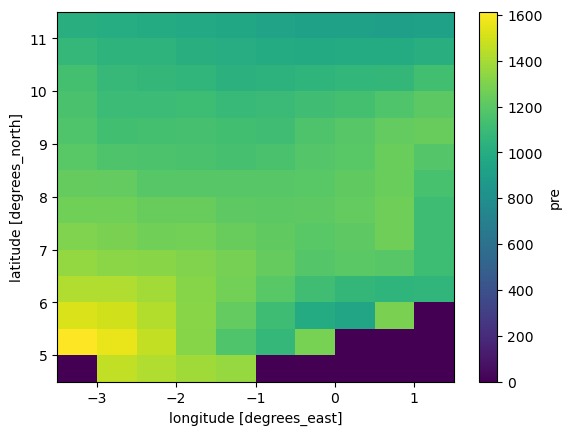

In [15]:
cr1_annual_sum.mean("year").plot()


# LONG TERM ANNUAL CHANGE
# MEAN


In [16]:
cr1_clim=cr1_annual_sum.mean("year")
cr2_clim=cr2_annual_sum.mean("year")
cr3_clim=cr3_annual_sum.mean("year")
cr4_clim=cr4_annual_sum.mean("year")



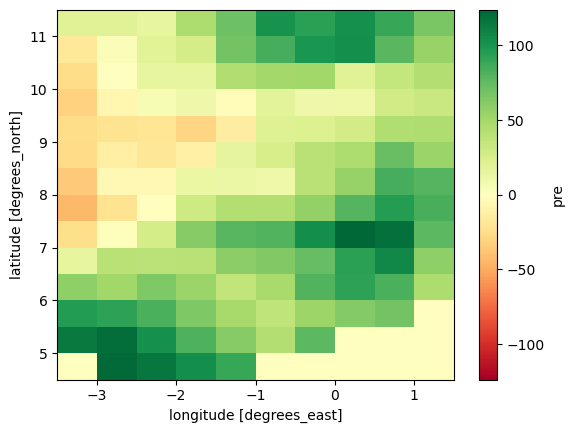

In [17]:
(cr2_clim - cr1_clim).plot(cmap="RdYlGn")



# PLot of annual longterm change

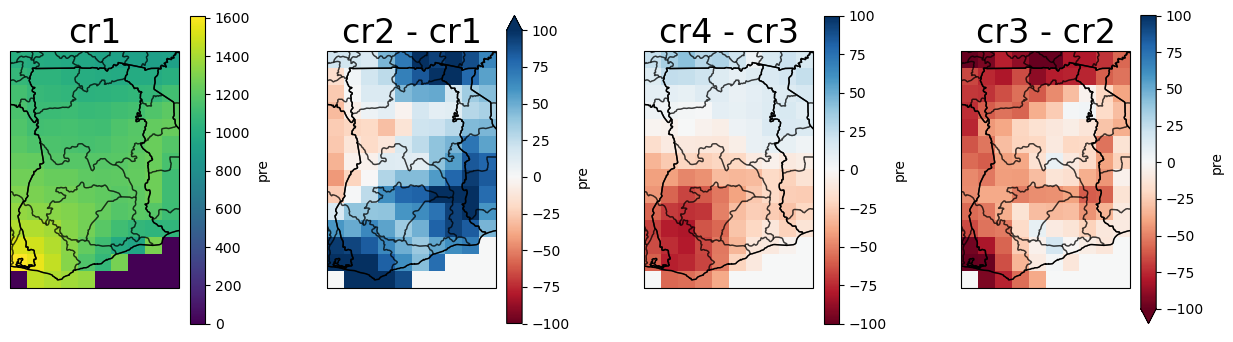

In [18]:
plt.figure(figsize=(15,4))  ##### Specifying the size of the figure
plt.subplots_adjust(wspace=0.5)


ax1=plt.subplot(141, projection=ccrs.PlateCarree()) #to add a geospatial projection to represent the earth in a different way. so since Ghana is in the tropics we gonna use PlateCarree
cr1_clim.plot(ax=ax1)
ax1.set_title("cr1", fontsize=24)
ax1.coastlines()
ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.STATES, alpha= 0.5)               ####  adding territorial boundaries



#differences btwn cr2 and cr1
ax2=plt.subplot(1,4,2, projection=ccrs.PlateCarree())
(cr2_clim - cr1_clim).plot(ax=ax2, cmap='RdBu', vmin=-100, vmax=100)
ax2.set_title("cr2 - cr1", fontsize=24)
ax2.coastlines()
ax2.add_feature(cf.BORDERS)
ax2.add_feature(cf.STATES, alpha= 0.5)               ####  adding territorial boundaries


#differences btwn cr4 and cr3
ax3=plt.subplot(1,4,3, projection=ccrs.PlateCarree())
(cr4_clim - cr3_clim).plot(ax=ax3, cmap='RdBu', vmin=-100, vmax=100)
ax3.set_title("cr4 - cr3", fontsize=24)
ax3.coastlines()
ax3.add_feature(cf.BORDERS)
ax3.add_feature(cf.STATES, alpha= 0.5)               ####  adding territorial boundaries


#differences btwn cr3 and cr2
ax4=plt.subplot(1,4,4, projection=ccrs.PlateCarree())
(cr3_clim - cr2_clim).plot(ax=ax4, cmap='RdBu', vmin=-100, vmax=100)
ax4.set_title("cr3 - cr2", fontsize=24)
ax4.coastlines()
ax4.add_feature(cf.BORDERS)
ax4.add_feature(cf.STATES, alpha= 0.5)               ####  adding territorial boundaries




#NB: RED FOR DRY AND BLUE FOR WET


# LONG TERM MONTHLY CHANGES

In [19]:
cr1_monthly_sum = cr1.groupby('time.month').mean('time')
cr2_monthly_sum = cr2.groupby('time.month').mean('time')
cr3_monthly_sum = cr3.groupby('time.month').mean('time')
cr4_monthly_sum = cr4.groupby('time.month').mean('time')

In [20]:
cr1_Clim_monthly = cr1_monthly_sum.mean('month')
cr2_Clim_monthly = cr2_monthly_sum.mean('month')
cr3_Clim_monthly = cr3_monthly_sum.mean('month')
cr4_Clim_monthly = cr4_monthly_sum.mean('month')

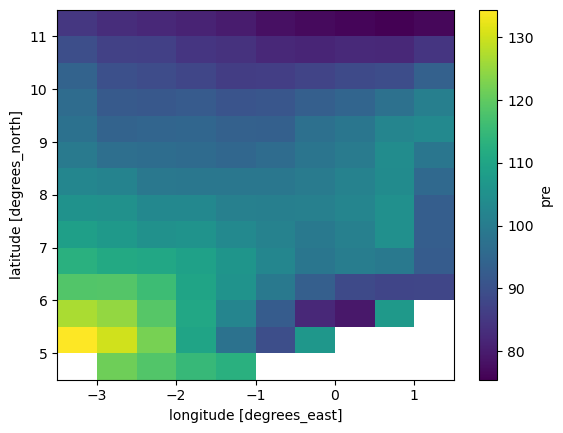

In [21]:
cr1_Clim_monthly.plot()

Text(0.5, 0.98, 'CLIMATE REGIMES FOR ALL FOUR SEAONS')

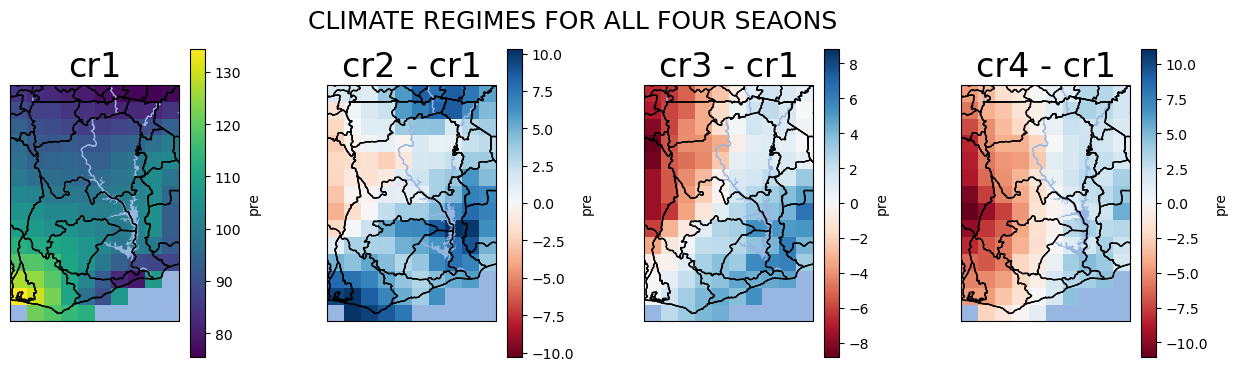

In [22]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(141, projection=ccrs.PlateCarree())
cr1_Clim_monthly.plot(ax=ax1)
ax1.set_title("cr1", fontsize=24)
ax1.coastlines()
ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.LAKES)
ax1.add_feature(cf.RIVERS)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.add_feature(cf.STATES)

ax2 = plt.subplot(142, projection=ccrs.PlateCarree())
(cr2_Clim_monthly - cr1_Clim_monthly).plot(ax=ax2, cmap='RdBu')
ax2.set_title("cr2 - cr1", fontsize=24)
ax2.coastlines()
ax2.add_feature(cf.BORDERS)
ax2.add_feature(cf.LAKES)
ax2.add_feature(cf.RIVERS)
ax2.add_feature(cf.LAND)
ax2.add_feature(cf.OCEAN)
ax2.add_feature(cf.STATES)

ax3= plt.subplot(143, projection=ccrs.PlateCarree())
(cr3_Clim_monthly - cr1_Clim_monthly).plot(ax=ax3, cmap='RdBu')
ax3.set_title("cr3 - cr1", fontsize=24)
ax3.coastlines()
ax3.add_feature(cf.BORDERS)
ax3.add_feature(cf.LAKES)
ax3.add_feature(cf.RIVERS)
ax3.add_feature(cf.LAND)
ax3.add_feature(cf.OCEAN)
ax3.add_feature(cf.STATES)

ax4= plt.subplot(144, projection=ccrs.PlateCarree())
(cr4_Clim_monthly - cr1_Clim_monthly).plot(ax=ax4, cmap='RdBu')
ax4.set_title("cr4 - cr1", fontsize=24)
ax4.coastlines()
ax4.add_feature(cf.BORDERS)
ax4.add_feature(cf.LAKES)
ax4.add_feature(cf.RIVERS)
ax4.add_feature(cf.LAND)
ax4.add_feature(cf.OCEAN)
ax4.add_feature(cf.STATES)

plt.suptitle('CLIMATE REGIMES FOR ALL FOUR SEAONS', fontsize=18)                  

                                         

# LONG TERM SEASONAL CHANGES

# Grouping by season

In [26]:
cr1_seasonal_sum = cr1.groupby('time.season').sum('time')
cr2_seasonal_sum = cr2.groupby('time.season').sum('time')
cr3_seasonal_sum = cr3.groupby('time.season').sum('time')
cr4_seasonal_sum = cr4.groupby('time.season').sum('time')

# mean of the seasonal climatology

In [27]:
cr1_clim_season = cr1_seasonal_sum.mean('season')
cr2_clim_season = cr2_seasonal_sum.mean('season')
cr3_clim_season = cr3_seasonal_sum.mean('season')
cr4_clim_season = cr4_seasonal_sum.mean('season')

# PLots of Seasoanal climatology

Text(0.5, 0.98, 'CLIMATE REGIMES FOR ALL FOUR SEAONS')

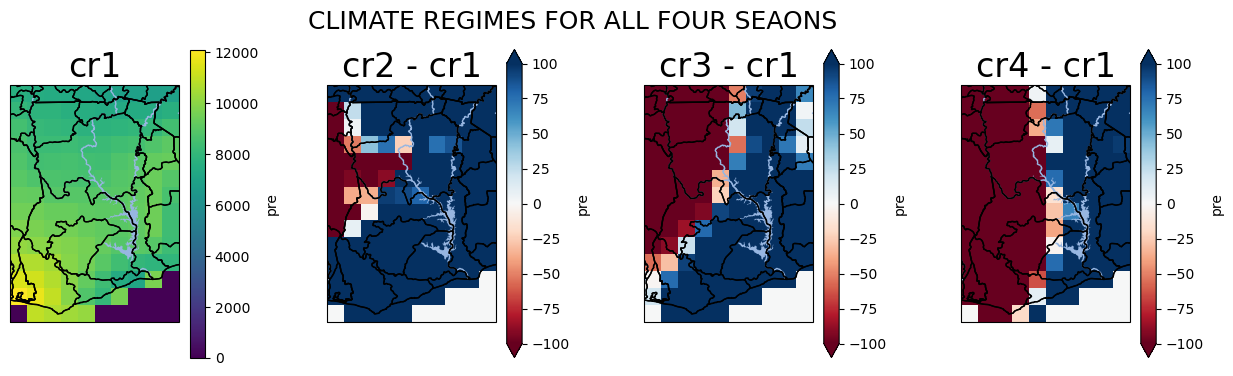

In [28]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)

ax1 = plt.subplot(141, projection=ccrs.PlateCarree())
cr1_clim_season.plot(ax=ax1)
ax1.set_title("cr1", fontsize=24)
ax1.coastlines()
ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.LAKES)
ax1.add_feature(cf.RIVERS)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.add_feature(cf.STATES)

ax2 = plt.subplot(142, projection=ccrs.PlateCarree())
(cr2_clim_season - cr1_clim_season).plot(ax=ax2, cmap='RdBu', vmin=-100, vmax=100)
ax2.set_title("cr2 - cr1", fontsize=24)
ax2.coastlines()
ax2.add_feature(cf.BORDERS)
ax2.add_feature(cf.LAKES)
ax2.add_feature(cf.RIVERS)
ax2.add_feature(cf.LAND)
ax2.add_feature(cf.OCEAN)
ax2.add_feature(cf.STATES)

ax3= plt.subplot(143, projection=ccrs.PlateCarree())
(cr3_clim_season - cr1_clim_season).plot(ax=ax3, cmap='RdBu', vmin=-100, vmax=100)
ax3.set_title("cr3 - cr1", fontsize=24)
ax3.coastlines()
ax3.add_feature(cf.BORDERS)
ax3.add_feature(cf.LAKES)
ax3.add_feature(cf.RIVERS)
ax3.add_feature(cf.LAND)
ax3.add_feature(cf.OCEAN)
ax3.add_feature(cf.STATES)

ax4= plt.subplot(144, projection=ccrs.PlateCarree())
(cr4_clim_season - cr1_clim_season).plot(ax=ax4, cmap='RdBu', vmin=-100, vmax=100)
ax4.set_title("cr4 - cr1", fontsize=24)
ax4.coastlines()
ax4.add_feature(cf.BORDERS)
ax4.add_feature(cf.LAKES)
ax4.add_feature(cf.RIVERS)
ax4.add_feature(cf.LAND)
ax4.add_feature(cf.OCEAN)
ax4.add_feature(cf.STATES)

plt.suptitle('CLIMATE REGIMES FOR ALL FOUR SEAONS', fontsize=18)                                         